## FNNLayers: Fully Connected Neural Network - Every Neuron Connected to Next Layer (Layers)

### Goal: Here, the investigation will be between three different models with variation in strictly the number of layers present in the model.

### TODO: use gephy to visualize network

#### Structure: 

### 0. Imports

In [1]:
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from torch import optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
import scipy
import numpy as np
from scipy import stats

### 1. Read Data

In [2]:
mushroom_data = pd.read_csv('raw_data/mushroom_cleaned.csv')
mushroom_data.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


### 2. Prepare Data

In [3]:
X = mushroom_data.drop(columns=['class'])
y = mushroom_data['class']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [6]:
# convert to tensors
X_train_tensor = torch.tensor(X_train, dtype = torch.float32)
X_test_tensor = torch.tensor(X_test, dtype = torch.float32)
y_train_tensor = torch.tensor(y_train, dtype = torch.float32)
y_test_tensor = torch.tensor(y_test, dtype = torch.float32)

### 3. Create NN
#### TODO: Track the weights throughout the training process (each epoch)

#### 3.1: One Layer

In [7]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_size):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, 8)
        self.output_layer = nn.Linear(8, 1)


    # feedforward function
    def forward(self, x):
        x = self.fc1(x)
        x = torch.relu(x)
        x = self.output_layer(x)
        return x

#### 3.2: Five Layers

In [8]:
class NeuralNetwork5(nn.Module):
    def __init__(self, input_size):
        super(NeuralNetwork5, self).__init__()
        self.fc1 = nn.Linear(input_size, 8)
        self.fc2 = nn.Linear(8, 8)
        self.fc3 = nn.Linear(8,8)
        self.fc4 = nn.Linear(8,8)
        self.fc5 = nn.Linear(8,8)
        self.output_layer = nn.Linear(8, 1)


    # feedforward function
    def forward(self, x):
        x = self.fc1(x)
        x = torch.relu(x)
        x = self.fc2(x)
        x = torch.relu(x)
        x = self.fc3(x)
        x = torch.relu(x)
        x = self.fc4(x)
        x = torch.relu(x)
        x = self.fc5(x)
        x = torch.relu(x)
        x = self.output_layer(x)
        return x

#### 3.3: Ten layers

In [9]:
class NeuralNetwork10(nn.Module):
    def __init__(self, input_size):
        super(NeuralNetwork10, self).__init__()
        self.fc1 = nn.Linear(input_size, 8)
        self.fc2 = nn.Linear(8, 8)
        self.fc3 = nn.Linear(8,8)
        self.fc4 = nn.Linear(8,8)
        self.fc5 = nn.Linear(8,8)
        self.fc6 = nn.Linear(8, 8)
        self.fc7 = nn.Linear(8,8)
        self.fc8 = nn.Linear(8,8)
        self.fc9 = nn.Linear(8,8)
        self.fc10 = nn.Linear(8,8)
        self.output_layer = nn.Linear(8, 1)


    # feedforward function
    def forward(self, x):
        x = self.fc1(x)
        x = torch.relu(x)
        x = self.fc2(x)
        x = torch.relu(x)
        x = self.fc3(x)
        x = torch.relu(x)
        x = self.fc4(x)
        x = torch.relu(x)
        x = self.fc5(x)
        x = torch.relu(x)
        x = self.fc6(x)
        x = torch.relu(x)
        x = self.fc7(x)
        x = torch.relu(x)
        x = self.fc8(x)
        x = torch.relu(x)
        x = self.fc9(x)
        x = torch.relu(x)
        x = self.fc10(x)
        x = torch.relu(x)
        x = self.output_layer(x)
        return x

### 3. Train Model

#### 3.1: One Layer Model

In [8]:
# variables needed
input_size = X_train.shape[1]


# initialize model
model = NeuralNetwork(input_size)

# loss function and optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), 0.001)

# number of training loops
epochs = 5000

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()

    output = model(X_train_tensor)


    y_train_tensor = y_train_tensor.view(-1, 1)
    loss = criterion(output, y_train_tensor)

    loss.backward()

    optimizer.step()
    if (epoch + 1) % 10 == 0:
        with torch.no_grad():
            model.eval()

            outputs = model(X_train_tensor)
            probabilities = torch.sigmoid(outputs)

            predictions = (probabilities > 0.5).float()

            accuracy = (y_train_tensor.flatten() == predictions.flatten()).float().mean()

            print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}, Accuracy: {accuracy.item()* 100:.2f}%')
        

model_train_acc = accuracy

Epoch [10/5000], Loss: 0.8734, Accuracy: 54.41%
Epoch [20/5000], Loss: 0.7134, Accuracy: 57.17%
Epoch [30/5000], Loss: 0.7013, Accuracy: 58.93%
Epoch [40/5000], Loss: 0.6897, Accuracy: 60.04%
Epoch [50/5000], Loss: 0.6827, Accuracy: 60.26%
Epoch [60/5000], Loss: 0.6780, Accuracy: 60.10%
Epoch [70/5000], Loss: 0.6746, Accuracy: 60.08%
Epoch [80/5000], Loss: 0.6712, Accuracy: 60.46%
Epoch [90/5000], Loss: 0.6686, Accuracy: 60.50%
Epoch [100/5000], Loss: 0.6669, Accuracy: 60.41%
Epoch [110/5000], Loss: 0.6659, Accuracy: 60.38%
Epoch [120/5000], Loss: 0.6651, Accuracy: 60.24%
Epoch [130/5000], Loss: 0.6645, Accuracy: 60.14%
Epoch [140/5000], Loss: 0.6640, Accuracy: 60.10%
Epoch [150/5000], Loss: 0.6635, Accuracy: 60.12%
Epoch [160/5000], Loss: 0.6630, Accuracy: 60.14%
Epoch [170/5000], Loss: 0.6626, Accuracy: 60.12%
Epoch [180/5000], Loss: 0.6622, Accuracy: 60.12%
Epoch [190/5000], Loss: 0.6618, Accuracy: 60.10%
Epoch [200/5000], Loss: 0.6615, Accuracy: 60.10%
Epoch [210/5000], Loss: 0.661

#### 3.2: Five Layer Model

In [11]:
# variables needed
input_size = X_train.shape[1]

# initialize model
model5 = NeuralNetwork5(input_size)

# loss function and optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model5.parameters(), 0.001)

# number of training loops
epochs = 5000

for epoch in range(epochs):
    model5.train()
    optimizer.zero_grad()

    output = model5(X_train_tensor)


    y_train_tensor = y_train_tensor.view(-1, 1)
    loss = criterion(output, y_train_tensor)

    loss.backward()

    optimizer.step()
    if (epoch + 1) % 10 == 0:
        with torch.no_grad():
            model5.eval()

            outputs = model5(X_train_tensor)
            probabilities = torch.sigmoid(outputs)

            predictions = (probabilities > 0.5).float()

            accuracy = (y_train_tensor.flatten() == predictions.flatten()).float().mean()

            print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}, Accuracy: {accuracy.item()* 100:.2f}%')
        

model5_train_acc = accuracy

Epoch [10/5000], Loss: 1.1362, Accuracy: 55.00%
Epoch [20/5000], Loss: 0.6952, Accuracy: 54.77%
Epoch [30/5000], Loss: 0.7164, Accuracy: 48.76%
Epoch [40/5000], Loss: 0.6986, Accuracy: 54.81%
Epoch [50/5000], Loss: 0.6869, Accuracy: 55.82%
Epoch [60/5000], Loss: 0.6873, Accuracy: 54.72%
Epoch [70/5000], Loss: 0.6850, Accuracy: 60.53%
Epoch [80/5000], Loss: 0.6827, Accuracy: 61.37%
Epoch [90/5000], Loss: 0.6782, Accuracy: 60.17%
Epoch [100/5000], Loss: 0.6767, Accuracy: 62.90%
Epoch [110/5000], Loss: 0.6756, Accuracy: 62.55%
Epoch [120/5000], Loss: 0.6746, Accuracy: 62.90%
Epoch [130/5000], Loss: 0.6722, Accuracy: 62.70%
Epoch [140/5000], Loss: 0.6679, Accuracy: 62.64%
Epoch [150/5000], Loss: 0.6661, Accuracy: 62.21%
Epoch [160/5000], Loss: 0.6642, Accuracy: 62.45%
Epoch [170/5000], Loss: 0.6626, Accuracy: 62.22%
Epoch [180/5000], Loss: 0.6611, Accuracy: 62.38%
Epoch [190/5000], Loss: 0.6598, Accuracy: 62.34%
Epoch [200/5000], Loss: 0.6585, Accuracy: 62.40%
Epoch [210/5000], Loss: 0.657

#### 3.3: Ten Layers

In [12]:
# variables needed
input_size = X_train.shape[1]

# initialize model
model10 = NeuralNetwork10(input_size)

# loss function and optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model10.parameters(), 0.001)

# number of training loops
epochs = 1000

for epoch in range(epochs):
    model10.train()
    optimizer.zero_grad()

    output = model10(X_train_tensor)


    y_train_tensor = y_train_tensor.view(-1, 1)
    loss = criterion(output, y_train_tensor)

    loss.backward()

    optimizer.step()
    if (epoch + 1) % 10 == 0:
        with torch.no_grad():
            model10.eval()

            outputs = model10(X_train_tensor)
            probabilities = torch.sigmoid(outputs)

            predictions = (probabilities > 0.5).float()

            accuracy = (y_train_tensor.flatten() == predictions.flatten()).float().mean()

            print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}, Accuracy: {accuracy.item()* 100:.2f}%')
        

model10_train_acc = accuracy

Epoch [10/1000], Loss: 0.6951, Accuracy: 45.00%
Epoch [20/1000], Loss: 0.6932, Accuracy: 58.09%
Epoch [30/1000], Loss: 0.6917, Accuracy: 55.00%
Epoch [40/1000], Loss: 0.6904, Accuracy: 55.00%
Epoch [50/1000], Loss: 0.6892, Accuracy: 55.00%
Epoch [60/1000], Loss: 0.6876, Accuracy: 55.00%
Epoch [70/1000], Loss: 0.6861, Accuracy: 55.00%
Epoch [80/1000], Loss: 0.6845, Accuracy: 55.00%
Epoch [90/1000], Loss: 0.6829, Accuracy: 55.00%
Epoch [100/1000], Loss: 0.6811, Accuracy: 55.00%
Epoch [110/1000], Loss: 0.6791, Accuracy: 55.00%
Epoch [120/1000], Loss: 0.6767, Accuracy: 55.00%
Epoch [130/1000], Loss: 0.6739, Accuracy: 55.00%
Epoch [140/1000], Loss: 0.6707, Accuracy: 55.00%
Epoch [150/1000], Loss: 0.6671, Accuracy: 55.00%
Epoch [160/1000], Loss: 0.6634, Accuracy: 55.00%
Epoch [170/1000], Loss: 0.6591, Accuracy: 55.00%
Epoch [180/1000], Loss: 0.6548, Accuracy: 55.00%
Epoch [190/1000], Loss: 0.6503, Accuracy: 55.00%
Epoch [200/1000], Loss: 0.6461, Accuracy: 55.00%
Epoch [210/1000], Loss: 0.641

### 4. Evaluation

#### 4.1: One Layer

In [9]:
model.eval()
with torch.no_grad():
    outputs = model(X_test_tensor)
    
    probabilities = torch.sigmoid(outputs)

    predictions = (probabilities > 0.5).float()

    accuracy = (y_test_tensor.flatten() == predictions.flatten()).float().mean()

print(f"Accuracy: {accuracy.item()* 100:.2f}%")
model_test_acc = accuracy.item()*100

Accuracy: 67.32%


#### 4.2: Five Layers

In [10]:
model5.eval()
with torch.no_grad():
    outputs = model5(X_test_tensor)
    
    probabilities = torch.sigmoid(outputs)

    predictions = (probabilities > 0.5).float()

    accuracy = (y_test_tensor.flatten() == predictions.flatten()).float().mean()

print(f"Accuracy: {accuracy.item()* 100:.2f}%")
model5_test_acc = accuracy.item()*100

Accuracy: 80.70%


#### 4.3: Ten Layers

In [15]:
model10.eval()
with torch.no_grad():
    outputs = model10(X_test_tensor)
    
    probabilities = torch.sigmoid(outputs)

    predictions = (probabilities > 0.5).float()

    accuracy = (y_test_tensor.flatten() == predictions.flatten()).float().mean()

print(f"Accuracy: {accuracy.item()* 100:.2f}%")
model10_test_acc = accuracy.item()*100

Accuracy: 72.72%


### 5. Weight Investigation

#### 5.1: One Layer

In [12]:
# dictionary to hold names and weights associated with each layer
model_dict = {"name":[], "weights":[]}

for name, param in model.state_dict().items():
    model_dict["name"].append(name)
    model_dict["weights"].append(param.data.numpy())

#### 5.2: Five Layers

In [10]:
# dictionary to hold names and weights associated with each layer
model5_dict = {"name":[], "weights":[]}

for name, param in model5.state_dict().items():
    model5_dict["name"].append(name)
    model5_dict["weights"].append(param.data.numpy())

NameError: name 'model5' is not defined

In [18]:
model5.state_dict()

OrderedDict([('fc1.weight',
              tensor([[ 0.2834,  1.2203, -1.2098, -0.6261, -0.4220,  0.1332, -0.7896,  0.1784],
                      [ 0.1958,  0.3152,  1.6432, -0.3549, -0.0257, -0.0239,  0.6950,  0.0076],
                      [-0.0598,  0.3053,  1.1451,  0.1357,  1.1975,  0.1114, -0.3978, -0.1248],
                      [-0.1384,  1.7774,  0.4090,  0.6033,  0.8667,  0.1735, -0.8725, -2.1997],
                      [ 0.1893, -1.4775, -0.0651,  0.7470,  0.7113,  0.2428,  0.7001, -0.3409],
                      [ 0.0045,  0.1340, -0.6629, -0.2235, -0.7883,  0.1047,  0.2442, -0.3270],
                      [-0.0277,  0.3400,  1.8491,  0.3623, -1.2998,  0.0152, -0.2052,  0.0933],
                      [-0.2422,  1.2624,  0.7975, -0.0247,  1.1538,  0.1953,  0.3232, -0.0520]])),
             ('fc1.bias',
              tensor([-0.0359,  0.8625,  1.0011, -2.6662, -0.8936, -0.8149,  0.4131,  0.7545])),
             ('fc2.weight',
              tensor([[-0.3665,  0.2376,  0.2063, 

#### 5.3: Ten Layers

In [18]:
# dictionary to hold names and weights associated with each layer
model10_dict = {"name":[], "weights":[]}

for name, param in model10.state_dict().items():
    model10_dict["name"].append(name)
    model10_dict["weights"].append(param.data.numpy())

### 6. Visualization

#### 6.1: One Layer Network

##### 6.1a: One Layer NN Weights by Feature (Want this for each layer)

Text(0, 0.5, 'Weight Value')

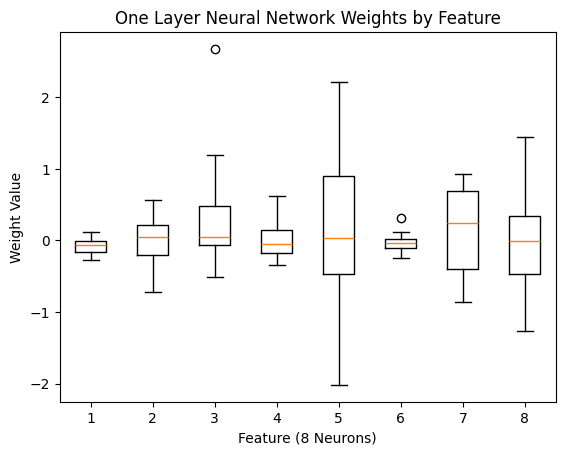

In [13]:
feature_boxplot_dict = {"boxes":[]}
for i in range(len(model_dict["weights"][0])):
    feature_boxplot_dict["boxes"].append(list(model_dict["weights"][0][:,i]))
bias = list(model_dict["weights"][1])
plt.boxplot(feature_boxplot_dict["boxes"])
plt.title("One Layer Neural Network Weights by Feature")
plt.xlabel("Feature (8 Neurons)")
plt.ylabel("Weight Value")

##### 6.1b: One Layer NN Weights by Neuron (this does not really mean much)

Text(0, 0.5, 'Weight Value')

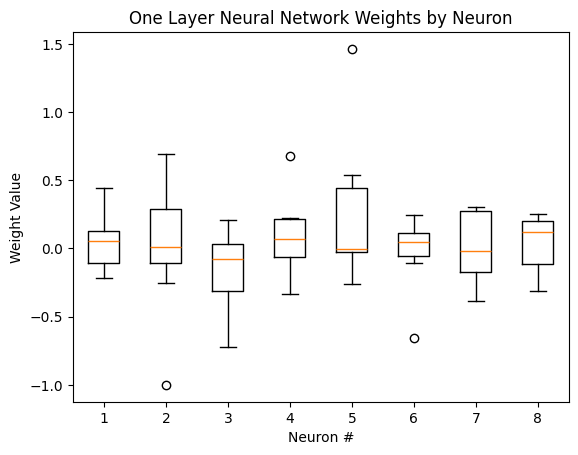

In [162]:
neuron_boxplot_dict = {"boxes":[]}
for i in range(len(model_dict["weights"][0])):
    neuron_boxplot_dict["boxes"].append(list(model_dict["weights"][0][i]))
bias = list(model_dict["weights"][1])
plt.boxplot(neuron_boxplot_dict["boxes"])
plt.title("One Layer Neural Network Weights by Neuron")
plt.xlabel("Neuron #")
plt.ylabel("Weight Value")

#### 6.1c: One Layer NN Weights by Layer


Text(44.222222222222214, 0.5, 'Weight Value')

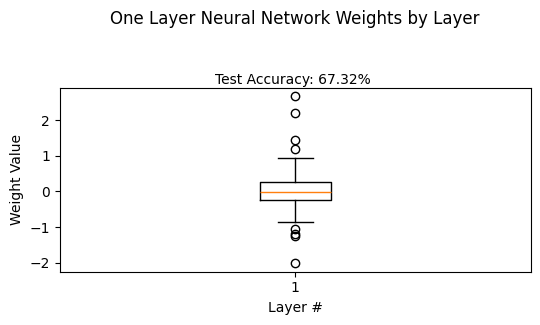

In [15]:
layer_boxplot_dict = {"boxes":[]}
for i in range(0,1):
    layer_boxplot_dict["boxes"].append(list(model_dict["weights"][i].flatten()))
plt.boxplot(layer_boxplot_dict['boxes'])
plt.title("One Layer Neural Network Weights by Layer", y =1.3)
plt.tight_layout(pad =5)
plt.text(.83, 3, f"Test Accuracy: {model_test_acc:.2f}%")
plt.xlabel("Layer #")
plt.ylabel("Weight Value")

#### 6.1d: Q-Q Plot for Singular Layer

Text(0.5, 1.0, 'Logistic Q-Q Plot')

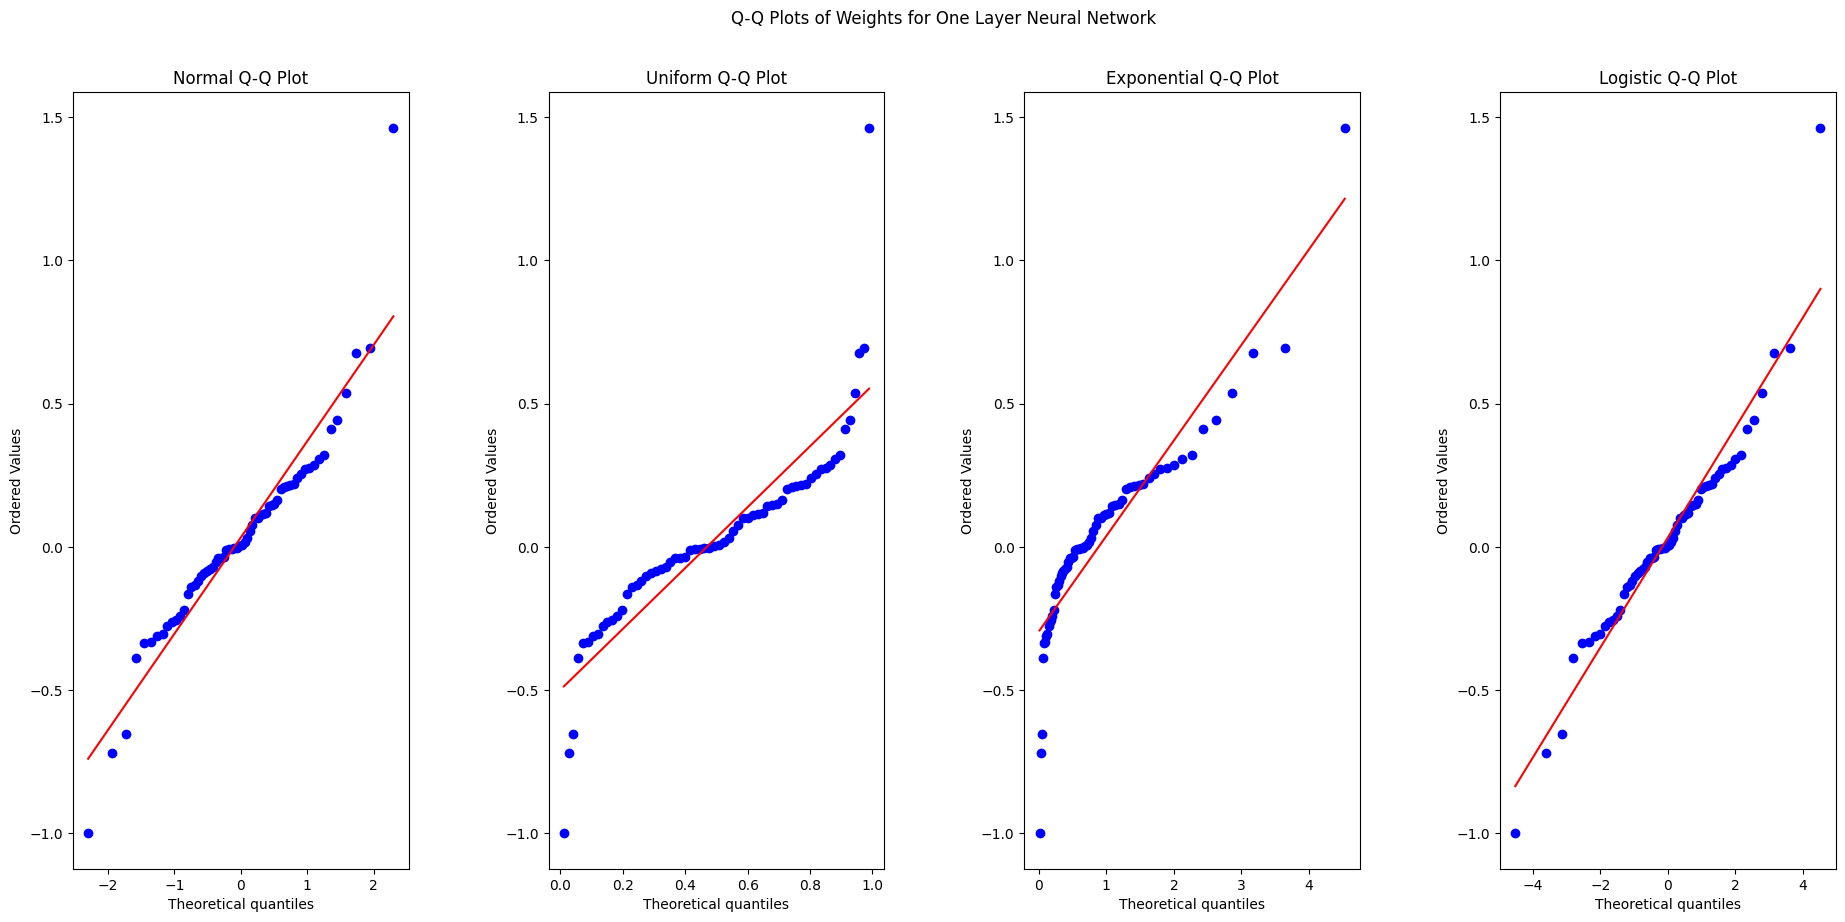

In [164]:
qq_points = model_dict['weights'][0].flatten()

fig, axes = plt.subplots(1, 4, figsize=(20, 10))
fig.tight_layout(pad=7.0)

fig.suptitle("Q-Q Plots of Weights for One Layer Neural Network")
stats.probplot(qq_points, dist = "norm", plot = axes[0])
axes[0].set_title("Normal Q-Q Plot")
stats.probplot(qq_points, dist = "uniform", plot = axes[1])
axes[1].set_title("Uniform Q-Q Plot")
stats.probplot(qq_points, dist = "expon", plot = axes[2])
axes[2].set_title("Exponential Q-Q Plot")
stats.probplot(qq_points, dist = "logistic", plot = axes[3])
axes[3].set_title("Logistic Q-Q Plot")      



#### 6.2: Five Layers
#### TODO: Experiment with different sized networks (layers, nodes) 

##### 6.2a: Five Layer FCNN Weights by Feature (For Each Layer)

In [12]:
feature1_boxplot_dict = {"boxes":[]}
feature2_boxplot_dict = {"boxes":[]}
feature3_boxplot_dict = {"boxes":[]}
feature4_boxplot_dict = {"boxes":[]}
feature5_boxplot_dict = {"boxes":[]}
feature6_boxplot_dict = {"boxes":[]}
feature7_boxplot_dict = {"boxes":[]}
feature8_boxplot_dict = {"boxes":[]}

for i in range(0,10,2):
    feature1_boxplot_dict["boxes"].append(list(model5_dict["weights"][i][:,0]))
    feature2_boxplot_dict["boxes"].append(list(model5_dict["weights"][i][:,1]))
    feature3_boxplot_dict["boxes"].append(list(model5_dict["weights"][i][:,2]))
    feature4_boxplot_dict["boxes"].append(list(model5_dict["weights"][i][:,3]))
    feature5_boxplot_dict["boxes"].append(list(model5_dict["weights"][i][:,4]))
    feature6_boxplot_dict["boxes"].append(list(model5_dict["weights"][i][:,5]))
    feature7_boxplot_dict["boxes"].append(list(model5_dict["weights"][i][:,6]))
    feature8_boxplot_dict["boxes"].append(list(model5_dict["weights"][i][:,7]))


Text(0.43, 0.93, 'Test Accuracy: 80.69769740104675')

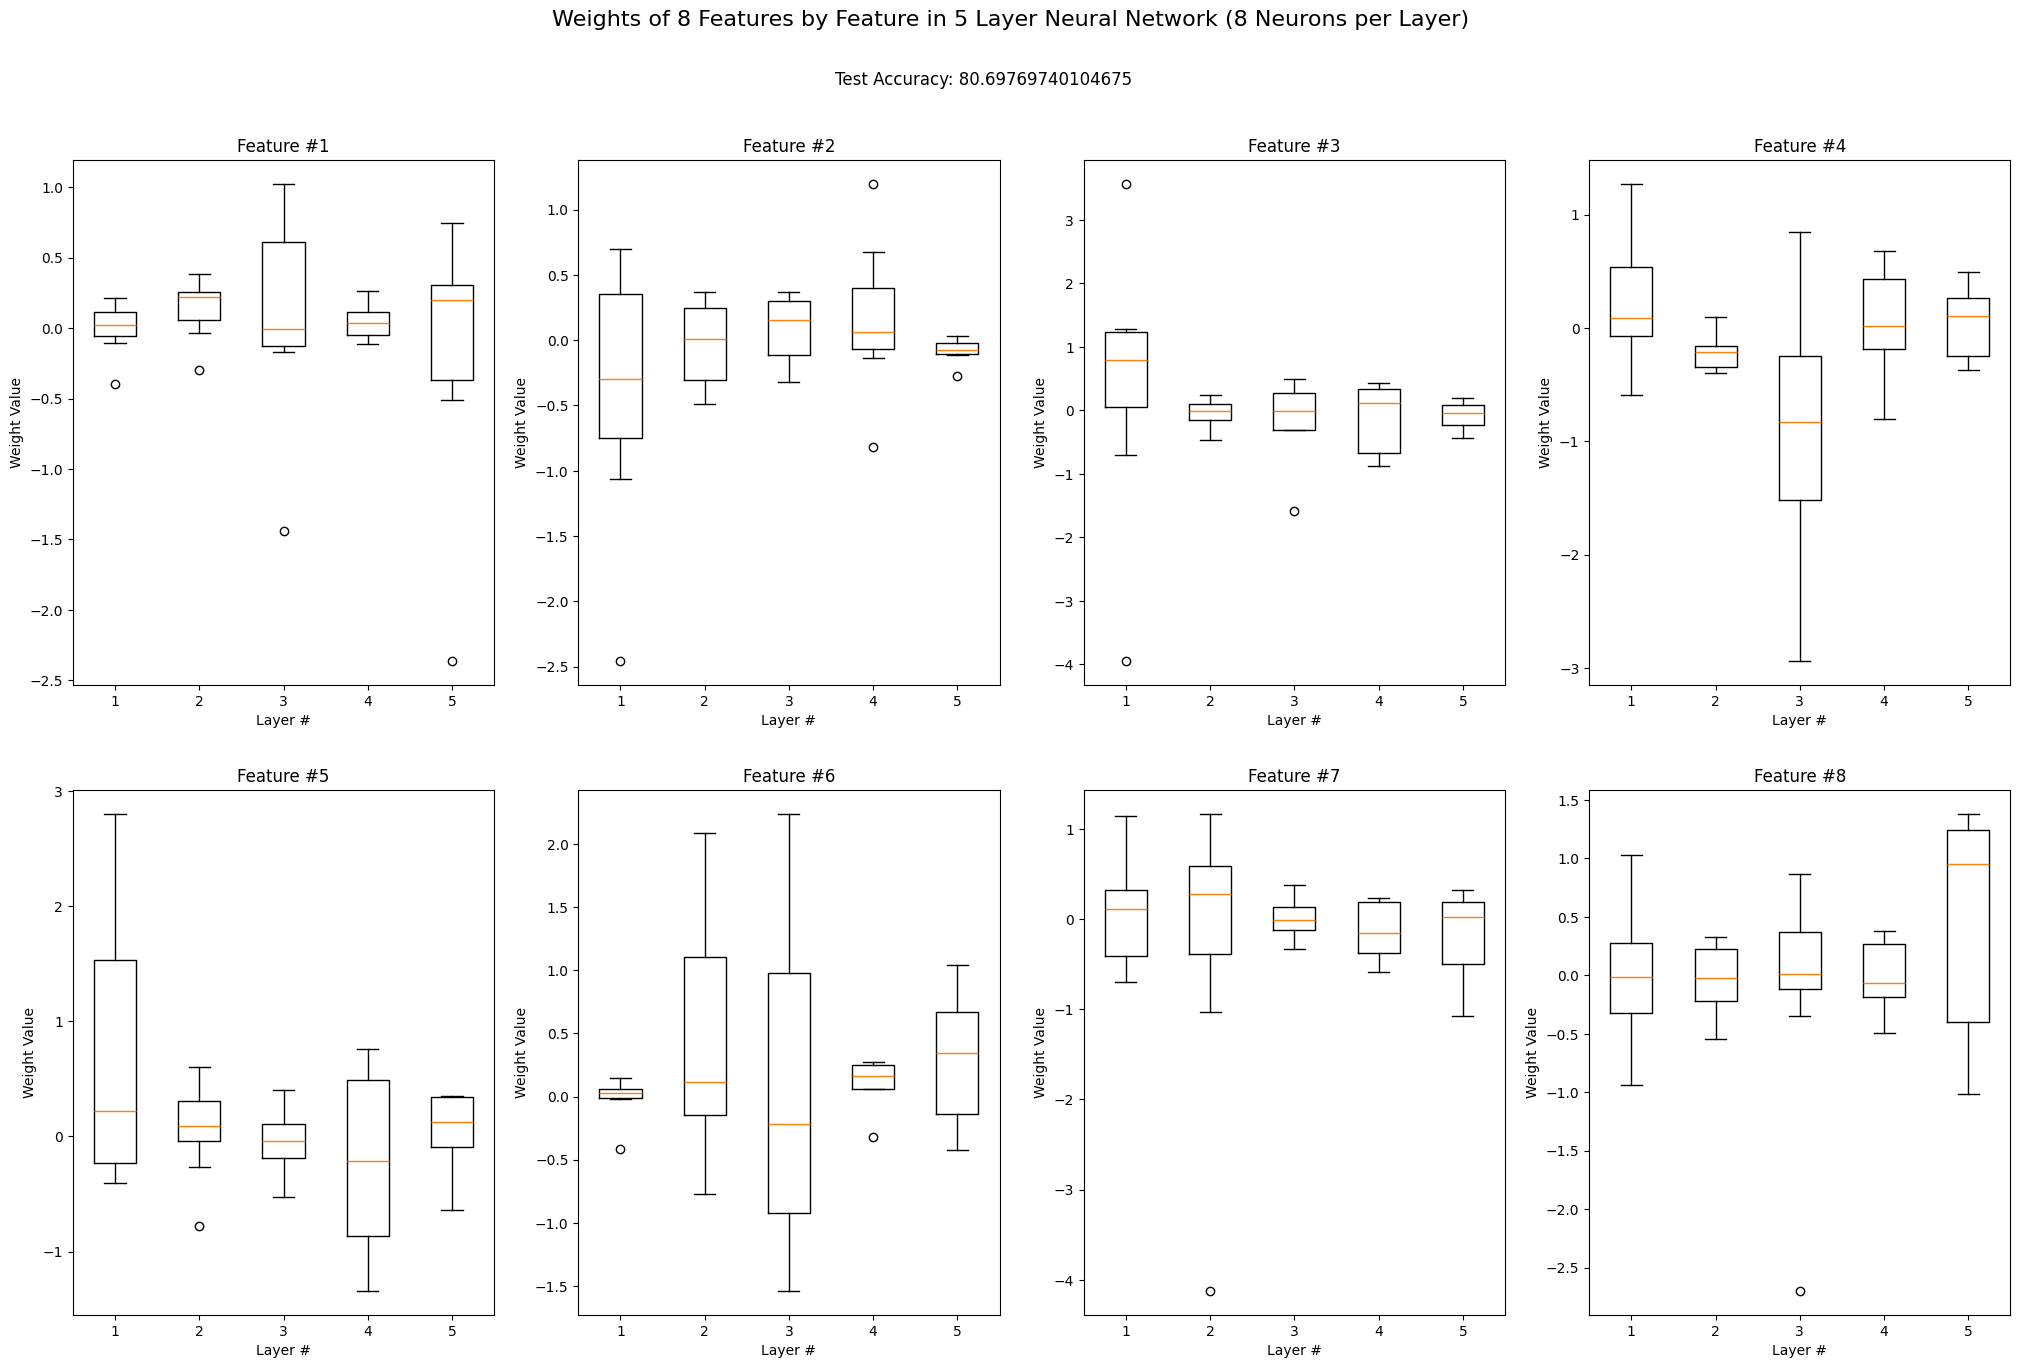

In [13]:
fig, axes = plt.subplots(2, 4, figsize=(25, 15))

axes[0,0].boxplot(feature1_boxplot_dict["boxes"])
axes[0,1].boxplot(feature2_boxplot_dict["boxes"])
axes[0,2].boxplot(feature3_boxplot_dict["boxes"])
axes[0,3].boxplot(feature4_boxplot_dict["boxes"])
axes[1,0].boxplot(feature5_boxplot_dict["boxes"])
axes[1,1].boxplot(feature6_boxplot_dict["boxes"])
axes[1,2].boxplot(feature7_boxplot_dict["boxes"])
axes[1,3].boxplot(feature8_boxplot_dict["boxes"])


for i in range(2):
    for j in range(4):
        axes[i,j].set_title(label = f"Feature #{i*4+j+1}")
        axes[i,j].set_xlabel("Layer #")
        axes[i,j].set_ylabel("Weight Value")

fig.suptitle("Weights of 8 Features by Feature in 5 Layer Neural Network (8 Neurons per Layer)", fontsize = 16)
fig.text(0.43, 0.93,f"Test Accuracy: {model5_test_acc}", fontsize =12)

##### 6.2b: Q-Q Plot for Feature #1

In [14]:
qplot1 = {"means":[]}
for i in feature1_boxplot_dict["boxes"]:
    qplot1["means"].append(np.mean(i))

In [15]:
qplot2 = {"means":[]}
for i in feature2_boxplot_dict["boxes"]:
    qplot2["means"].append(np.mean(i))

In [16]:
qplot3 = {"means":[]}
for i in feature3_boxplot_dict["boxes"]:
    qplot3["means"].append(np.mean(i))

In [17]:
qplot4 = {"means":[]}
for i in feature4_boxplot_dict["boxes"]:
    qplot4["means"].append(np.mean(i))


In [18]:
qplot5 = {"means":[]}
for i in feature5_boxplot_dict["boxes"]:
    qplot5["means"].append(np.mean(i))


In [19]:
qplot6 = {"means":[]}
for i in feature6_boxplot_dict["boxes"]:
    qplot6["means"].append(np.mean(i))


In [20]:
qplot7 = {"means":[]}
for i in feature7_boxplot_dict["boxes"]:
    qplot7["means"].append(np.mean(i))

In [21]:
qplot8 = {"means":[]}
for i in feature8_boxplot_dict["boxes"]:
    qplot8["means"].append(np.mean(i))

Text(0.43, 0.93, 'Test Accuracy: 80.69769740104675')

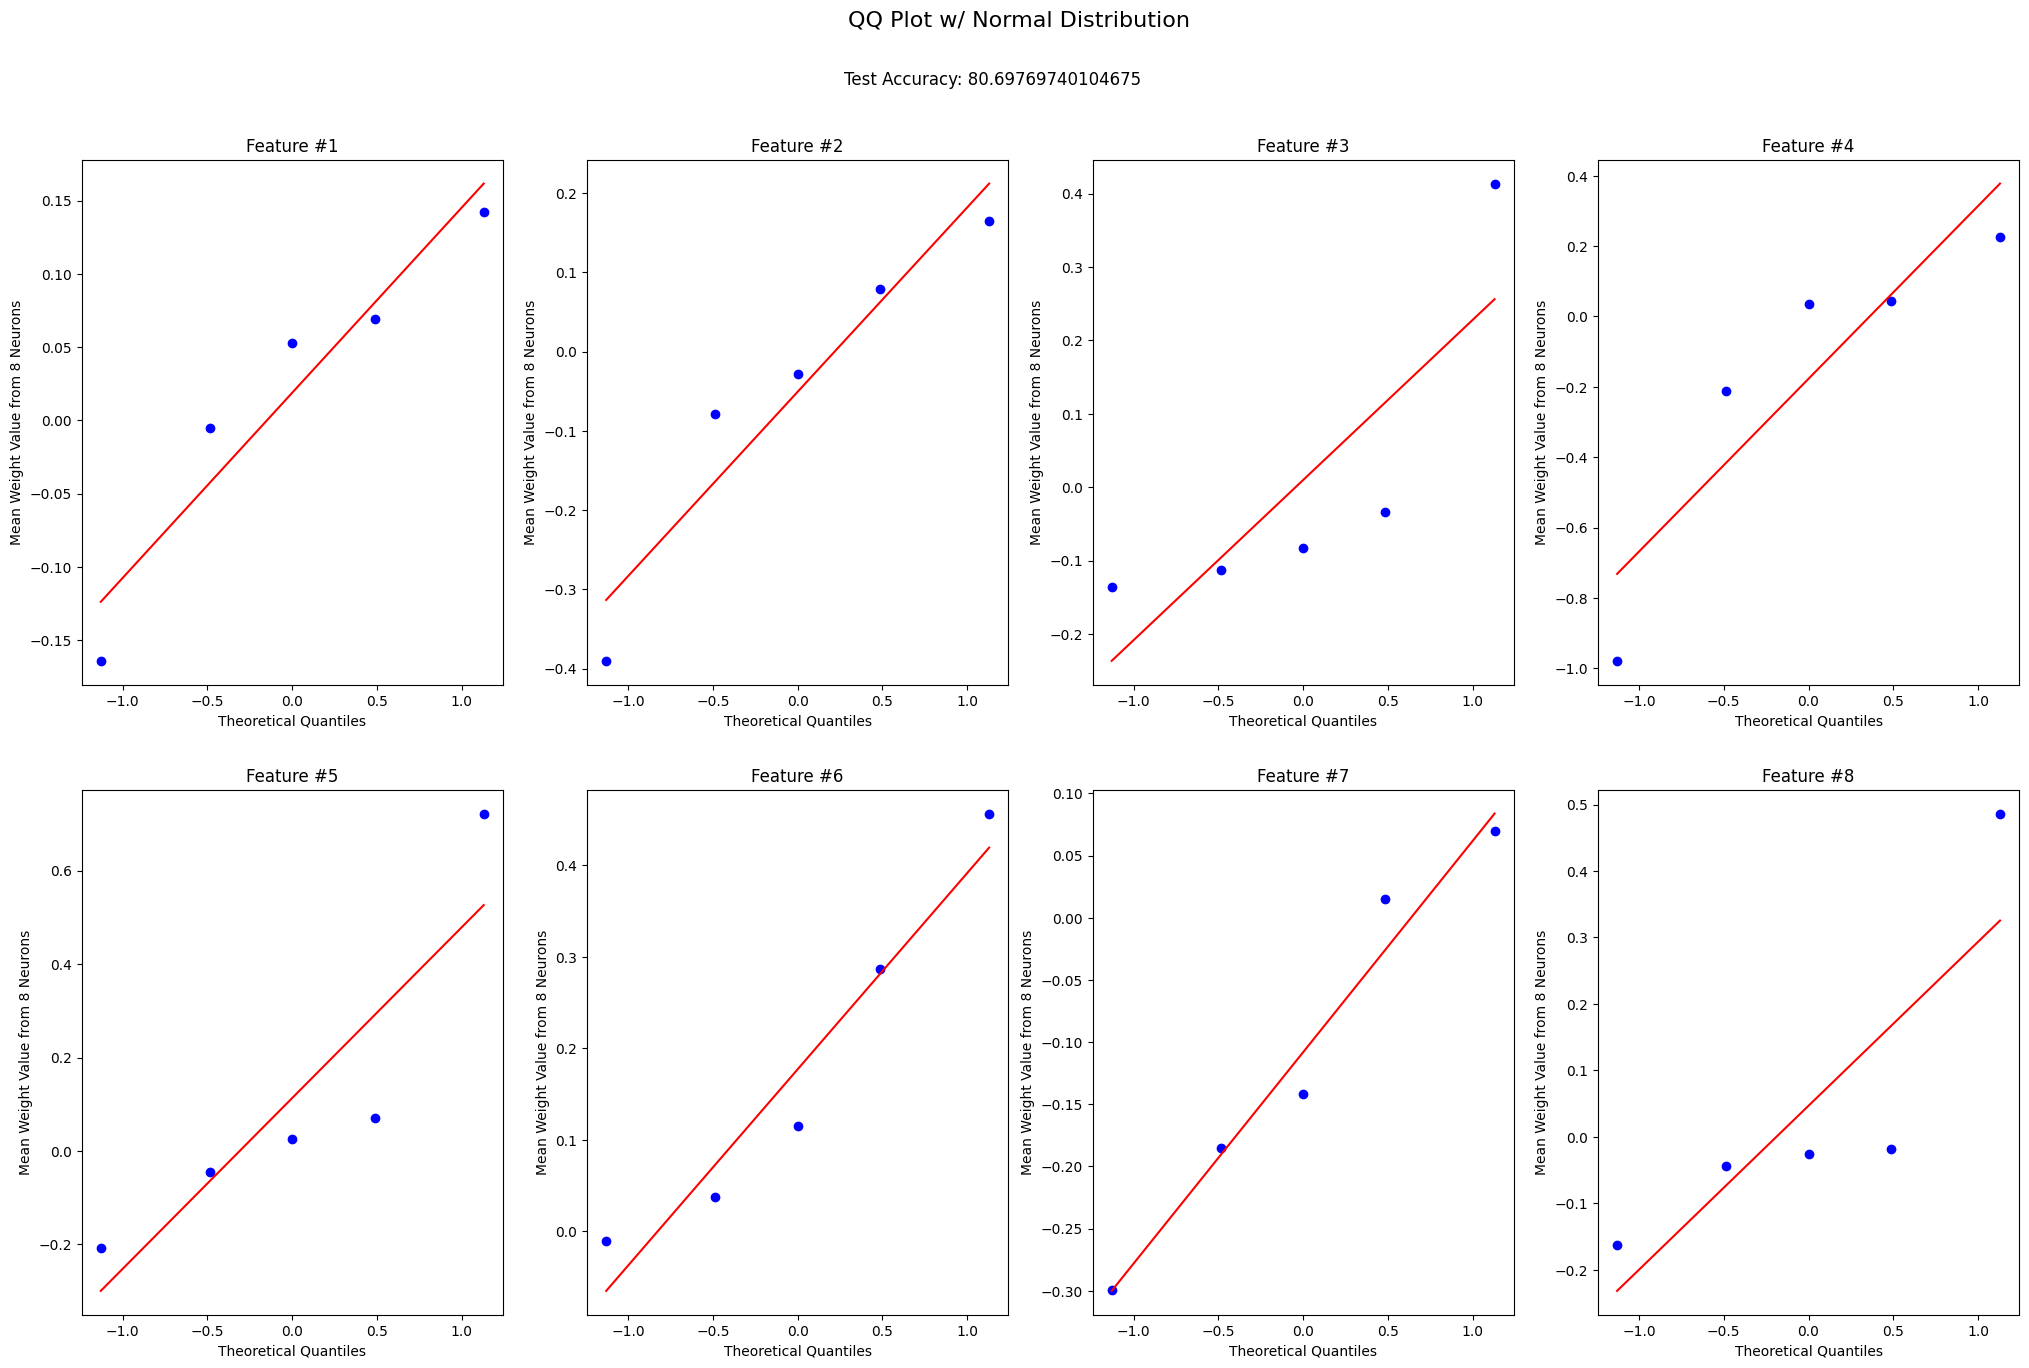

In [22]:
# normal distribution
dist = "norm"
fig2, axes2 = plt.subplots(2, 4, figsize=(25, 15))

stats.probplot(qplot1["means"], dist = dist, plot = axes2[0,0])
stats.probplot(qplot2["means"], dist = dist, plot = axes2[0,1])
stats.probplot(qplot3["means"], dist = dist, plot = axes2[0,2])
stats.probplot(qplot4["means"], dist = dist, plot = axes2[0,3])
stats.probplot(qplot5["means"], dist = dist, plot = axes2[1,0])
stats.probplot(qplot6["means"], dist = dist, plot = axes2[1,1])
stats.probplot(qplot7["means"], dist = dist, plot = axes2[1,2])
stats.probplot(qplot8["means"], dist = dist, plot = axes2[1,3])

for i in range(2):
    for j in range(4):
        axes2[i,j].set_title(label = f"Feature #{i*4+j+1}")
        axes2[i,j].set_xlabel("Theoretical Quantiles")
        axes2[i,j].set_ylabel("Mean Weight Value from 8 Neurons")

fig2.suptitle("QQ Plot w/ Normal Distribution", fontsize = 16)
fig2.text(0.43, 0.93,f"Test Accuracy: {model5_test_acc}", fontsize =12)


Text(0.43, 0.93, 'Test Accuracy: 80.69769740104675')

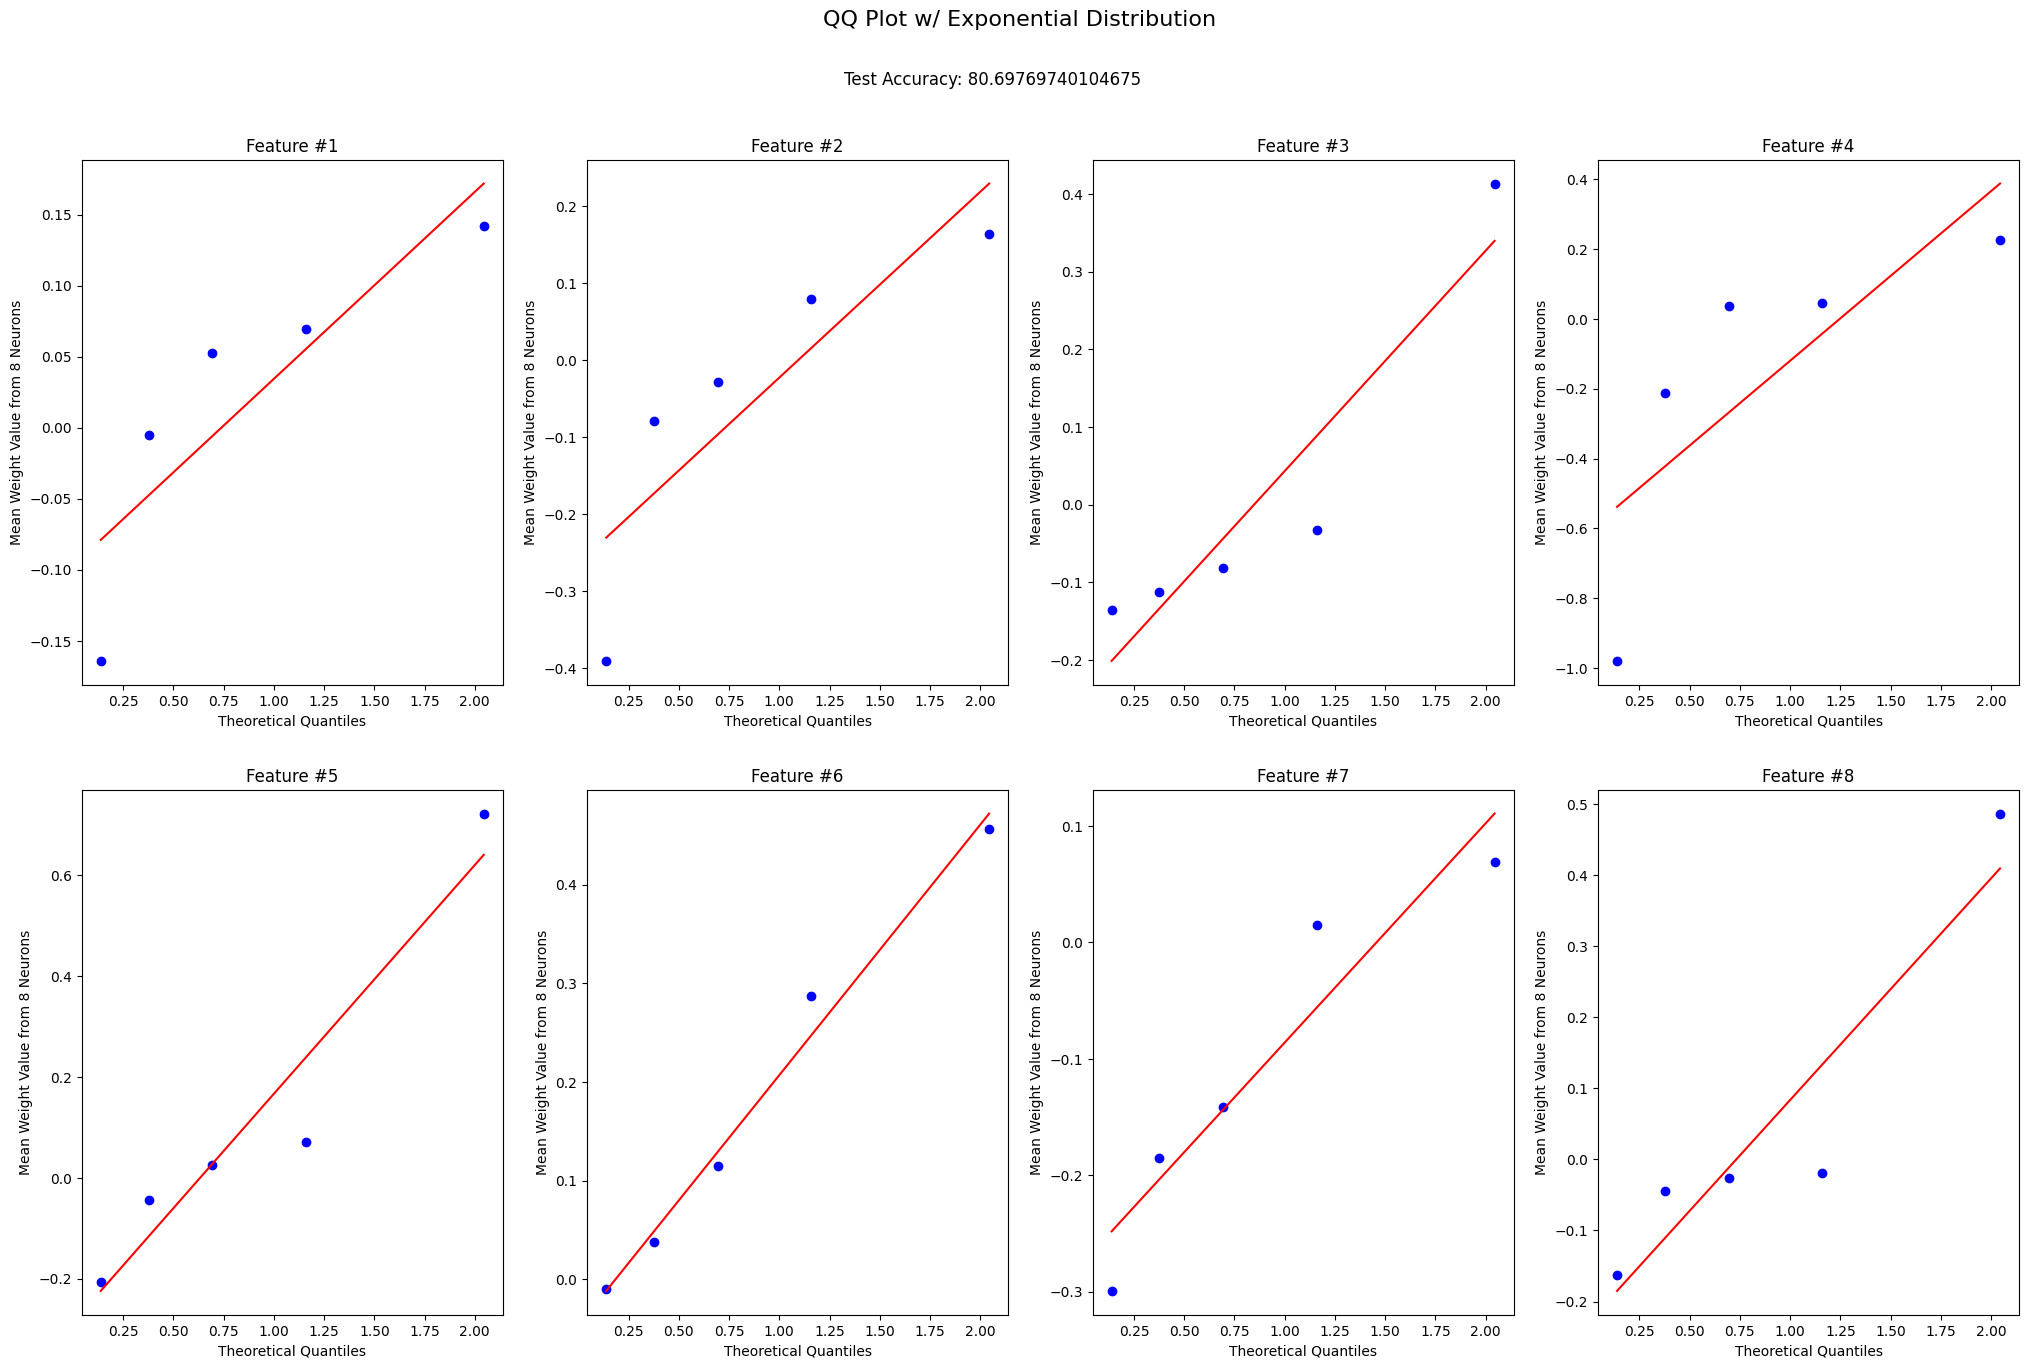

In [23]:
# exponential distribution
dist = "expon"
fig3, axes3 = plt.subplots(2, 4, figsize=(25, 15))

stats.probplot(qplot1["means"], dist = dist, plot = axes3[0,0])
stats.probplot(qplot2["means"], dist = dist, plot = axes3[0,1])
stats.probplot(qplot3["means"], dist = dist, plot = axes3[0,2])
stats.probplot(qplot4["means"], dist = dist, plot = axes3[0,3])
stats.probplot(qplot5["means"], dist = dist, plot = axes3[1,0])
stats.probplot(qplot6["means"], dist = dist, plot = axes3[1,1])
stats.probplot(qplot7["means"], dist = dist, plot = axes3[1,2])
stats.probplot(qplot8["means"], dist = dist, plot = axes3[1,3])

for i in range(2):
    for j in range(4):
        axes3[i,j].set_title(label = f"Feature #{i*4+j+1}")
        axes3[i,j].set_xlabel("Theoretical Quantiles")
        axes3[i,j].set_ylabel("Mean Weight Value from 8 Neurons")

fig3.suptitle("QQ Plot w/ Exponential Distribution", fontsize = 16)
fig3.text(0.43, 0.93,f"Test Accuracy: {model5_test_acc}", fontsize =12)

Text(0.43, 0.93, 'Test Accuracy: 80.69769740104675')

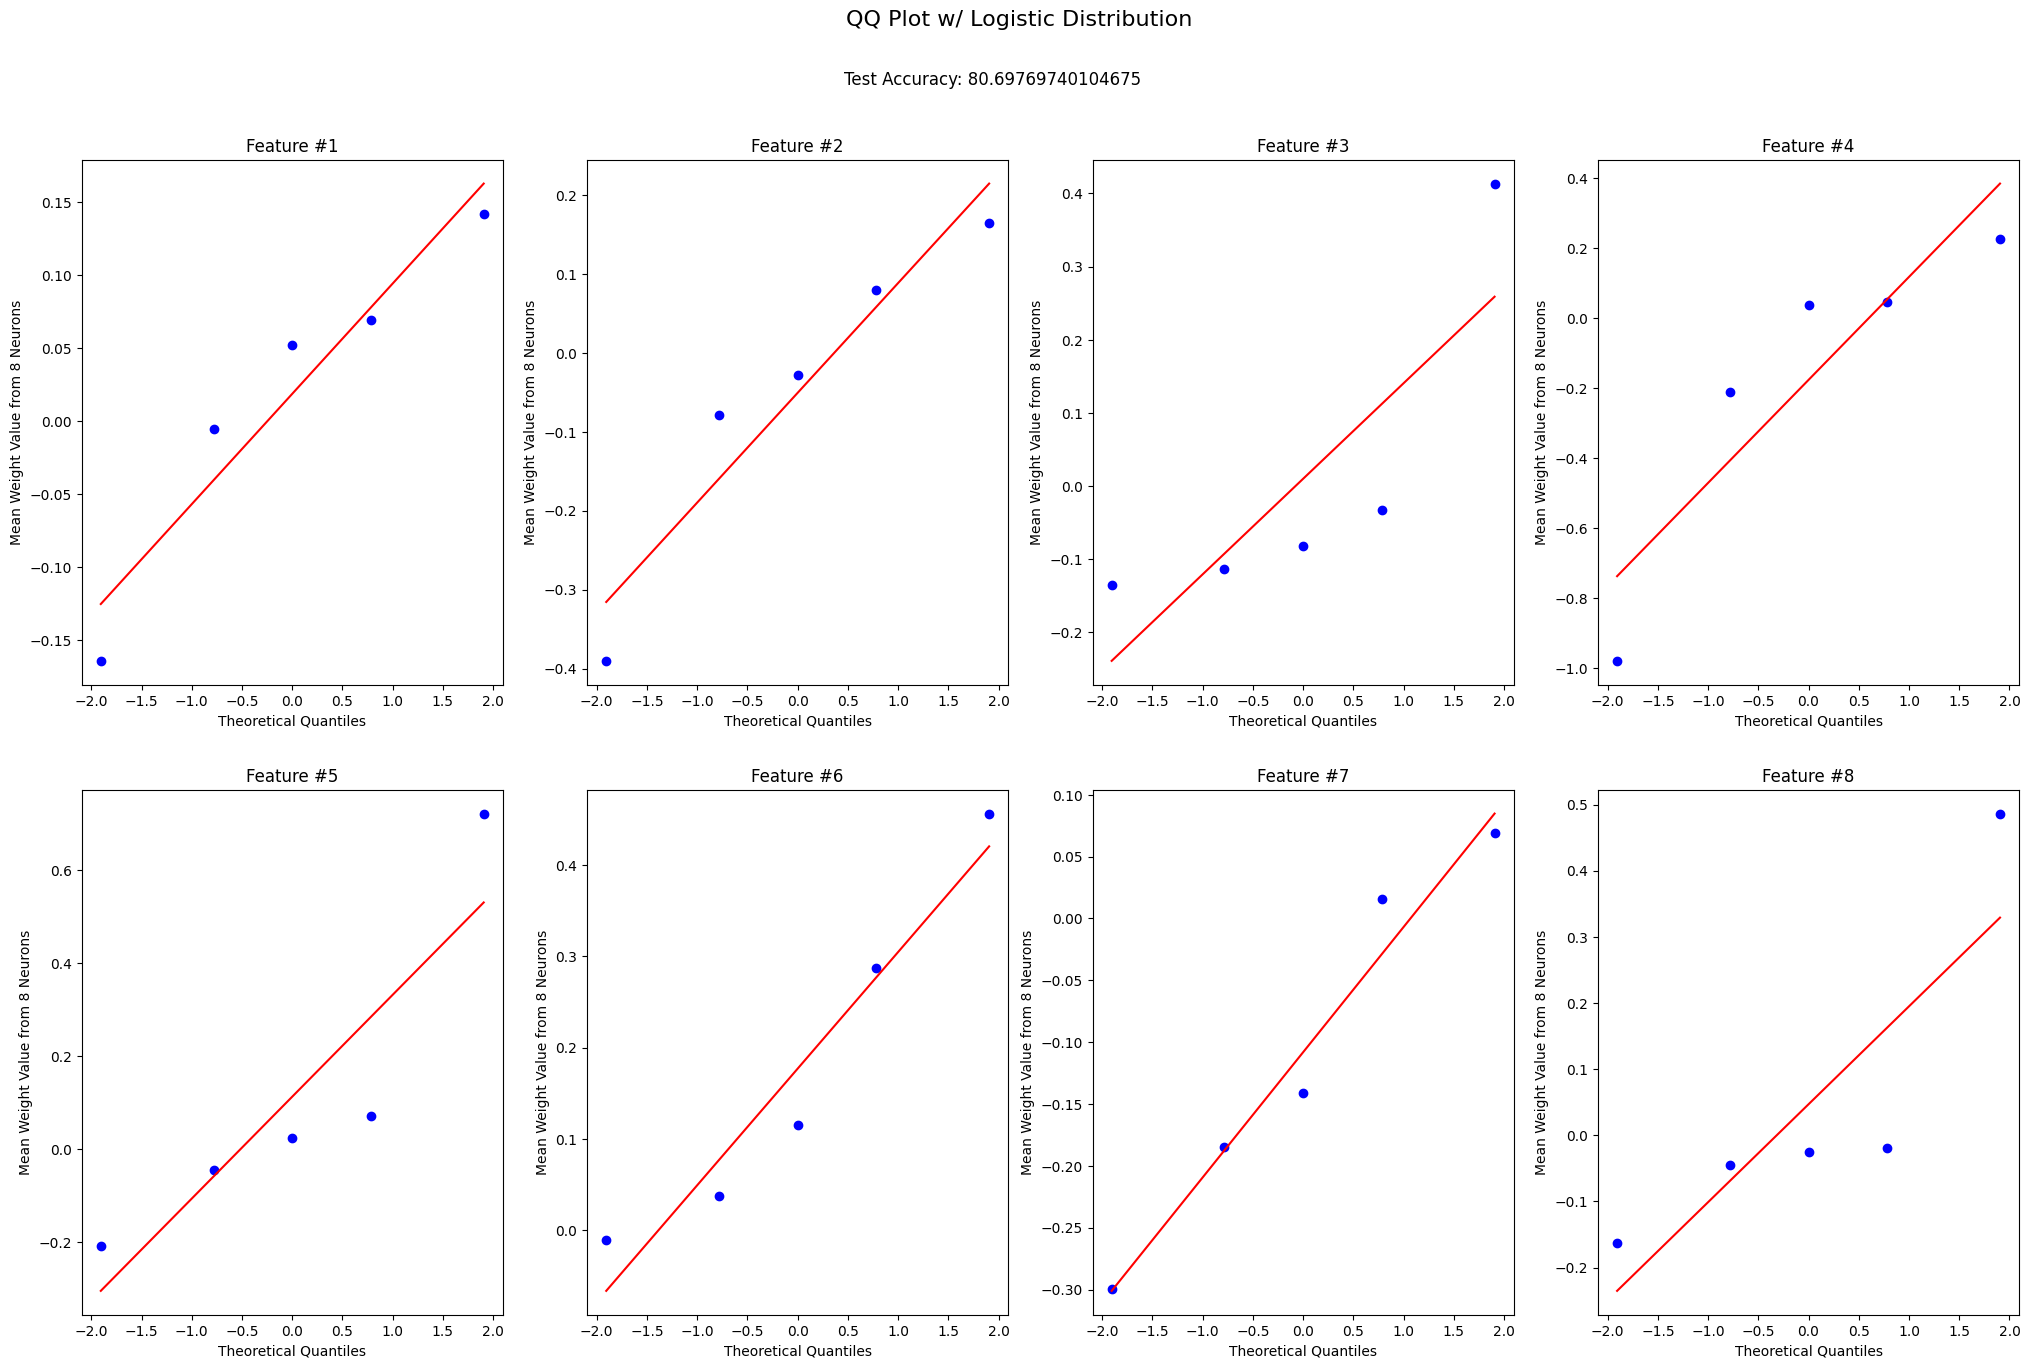

In [24]:
# logistic distribution
dist = "logistic"
fig4, axes4 = plt.subplots(2, 4, figsize=(25, 15))

stats.probplot(qplot1["means"], dist = dist, plot = axes4[0,0])
stats.probplot(qplot2["means"], dist = dist, plot = axes4[0,1])
stats.probplot(qplot3["means"], dist = dist, plot = axes4[0,2])
stats.probplot(qplot4["means"], dist = dist, plot = axes4[0,3])
stats.probplot(qplot5["means"], dist = dist, plot = axes4[1,0])
stats.probplot(qplot6["means"], dist = dist, plot = axes4[1,1])
stats.probplot(qplot7["means"], dist = dist, plot = axes4[1,2])
stats.probplot(qplot8["means"], dist = dist, plot = axes4[1,3])

for i in range(2):
    for j in range(4):
        axes4[i,j].set_title(label = f"Feature #{i*4+j+1}")
        axes4[i,j].set_xlabel("Theoretical Quantiles")
        axes4[i,j].set_ylabel("Mean Weight Value from 8 Neurons")

fig4.suptitle("QQ Plot w/ Logistic Distribution", fontsize = 16)
fig4.text(0.43, 0.93,f"Test Accuracy: {model5_test_acc}", fontsize =12)

##### 6.3c: Five Layer NN Weights by Layer

Text(57.972222222222214, 0.5, 'Weight Value')

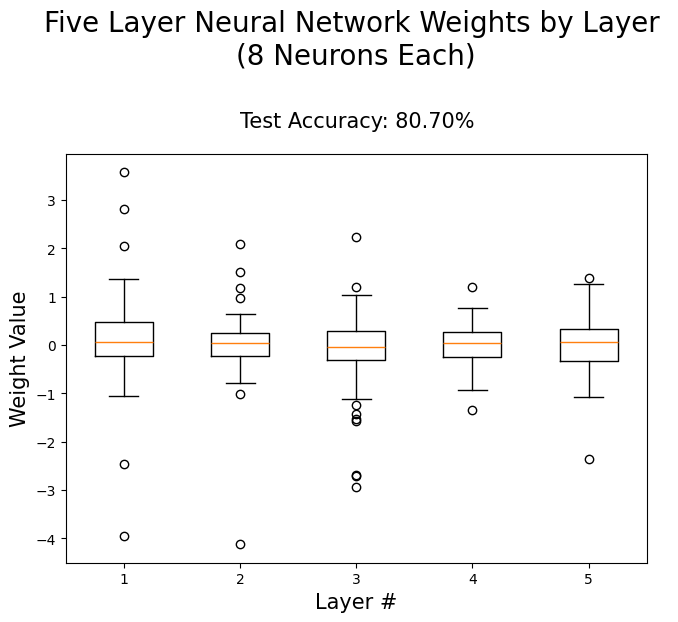

In [45]:
layer_boxplot_dict = {"boxes":[]}
for i in range(0,10,2):
    layer_boxplot_dict["boxes"].append(list(model5_dict["weights"][i].flatten()))
plt.figure(figsize=(7.5,7.5))
plt.boxplot(layer_boxplot_dict['boxes'])
plt.title("Five Layer Neural Network Weights by Layer \n(8 Neurons Each)", y =1.2, fontsize = 20)
plt.tight_layout(pad =5)
plt.text(2, 4.5, f"Test Accuracy: {model5_test_acc:.2f}%", fontsize = 15)
plt.xlabel("Layer #", fontsize = 15)
plt.ylabel("Weight Value", fontsize = 15)

##### 6.2d: Five Layer NN Weights Q-Q Plot

In [26]:
weight_values = sum(layer_boxplot_dict['boxes'], [])

Text(0.5, 1.0, 'Five Layer NN Weights (Normal Distribution)')

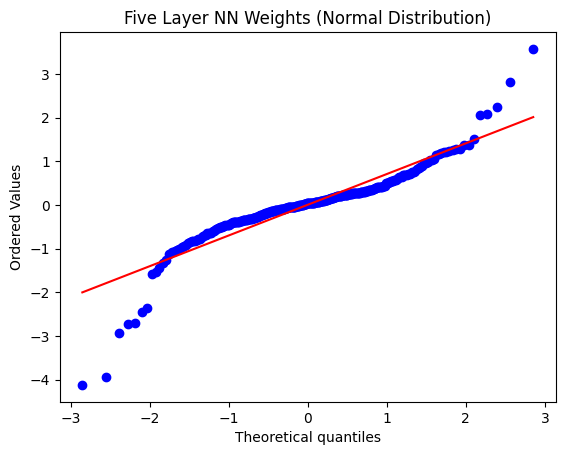

In [27]:
# normal distribution
stats.probplot(weight_values, dist = "norm", plot= plt)
plt.title("Five Layer NN Weights (Normal Distribution)")


Text(0.5, 1.0, 'Five Layer NN Weights (Exponential Distribution)')

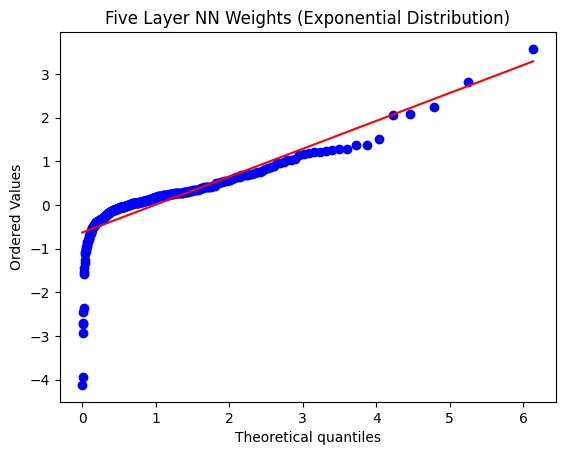

In [28]:
# exponential distribution
stats.probplot(weight_values, dist = "expon", plot= plt)
plt.title("Five Layer NN Weights (Exponential Distribution)")


Text(0.5, 1.0, 'Five Layer NN Weights (Logistic Distribution)')

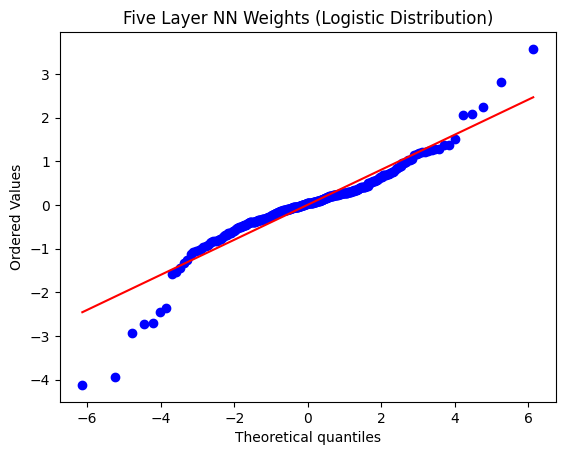

In [29]:
# log
stats.probplot(weight_values, dist = "logistic", plot= plt)
plt.title("Five Layer NN Weights (Logistic Distribution)")


##### 6.2e: Q-Q Plots for Each Layer

Text(0.5, 1.0, 'Logistic Q-Q Plot')

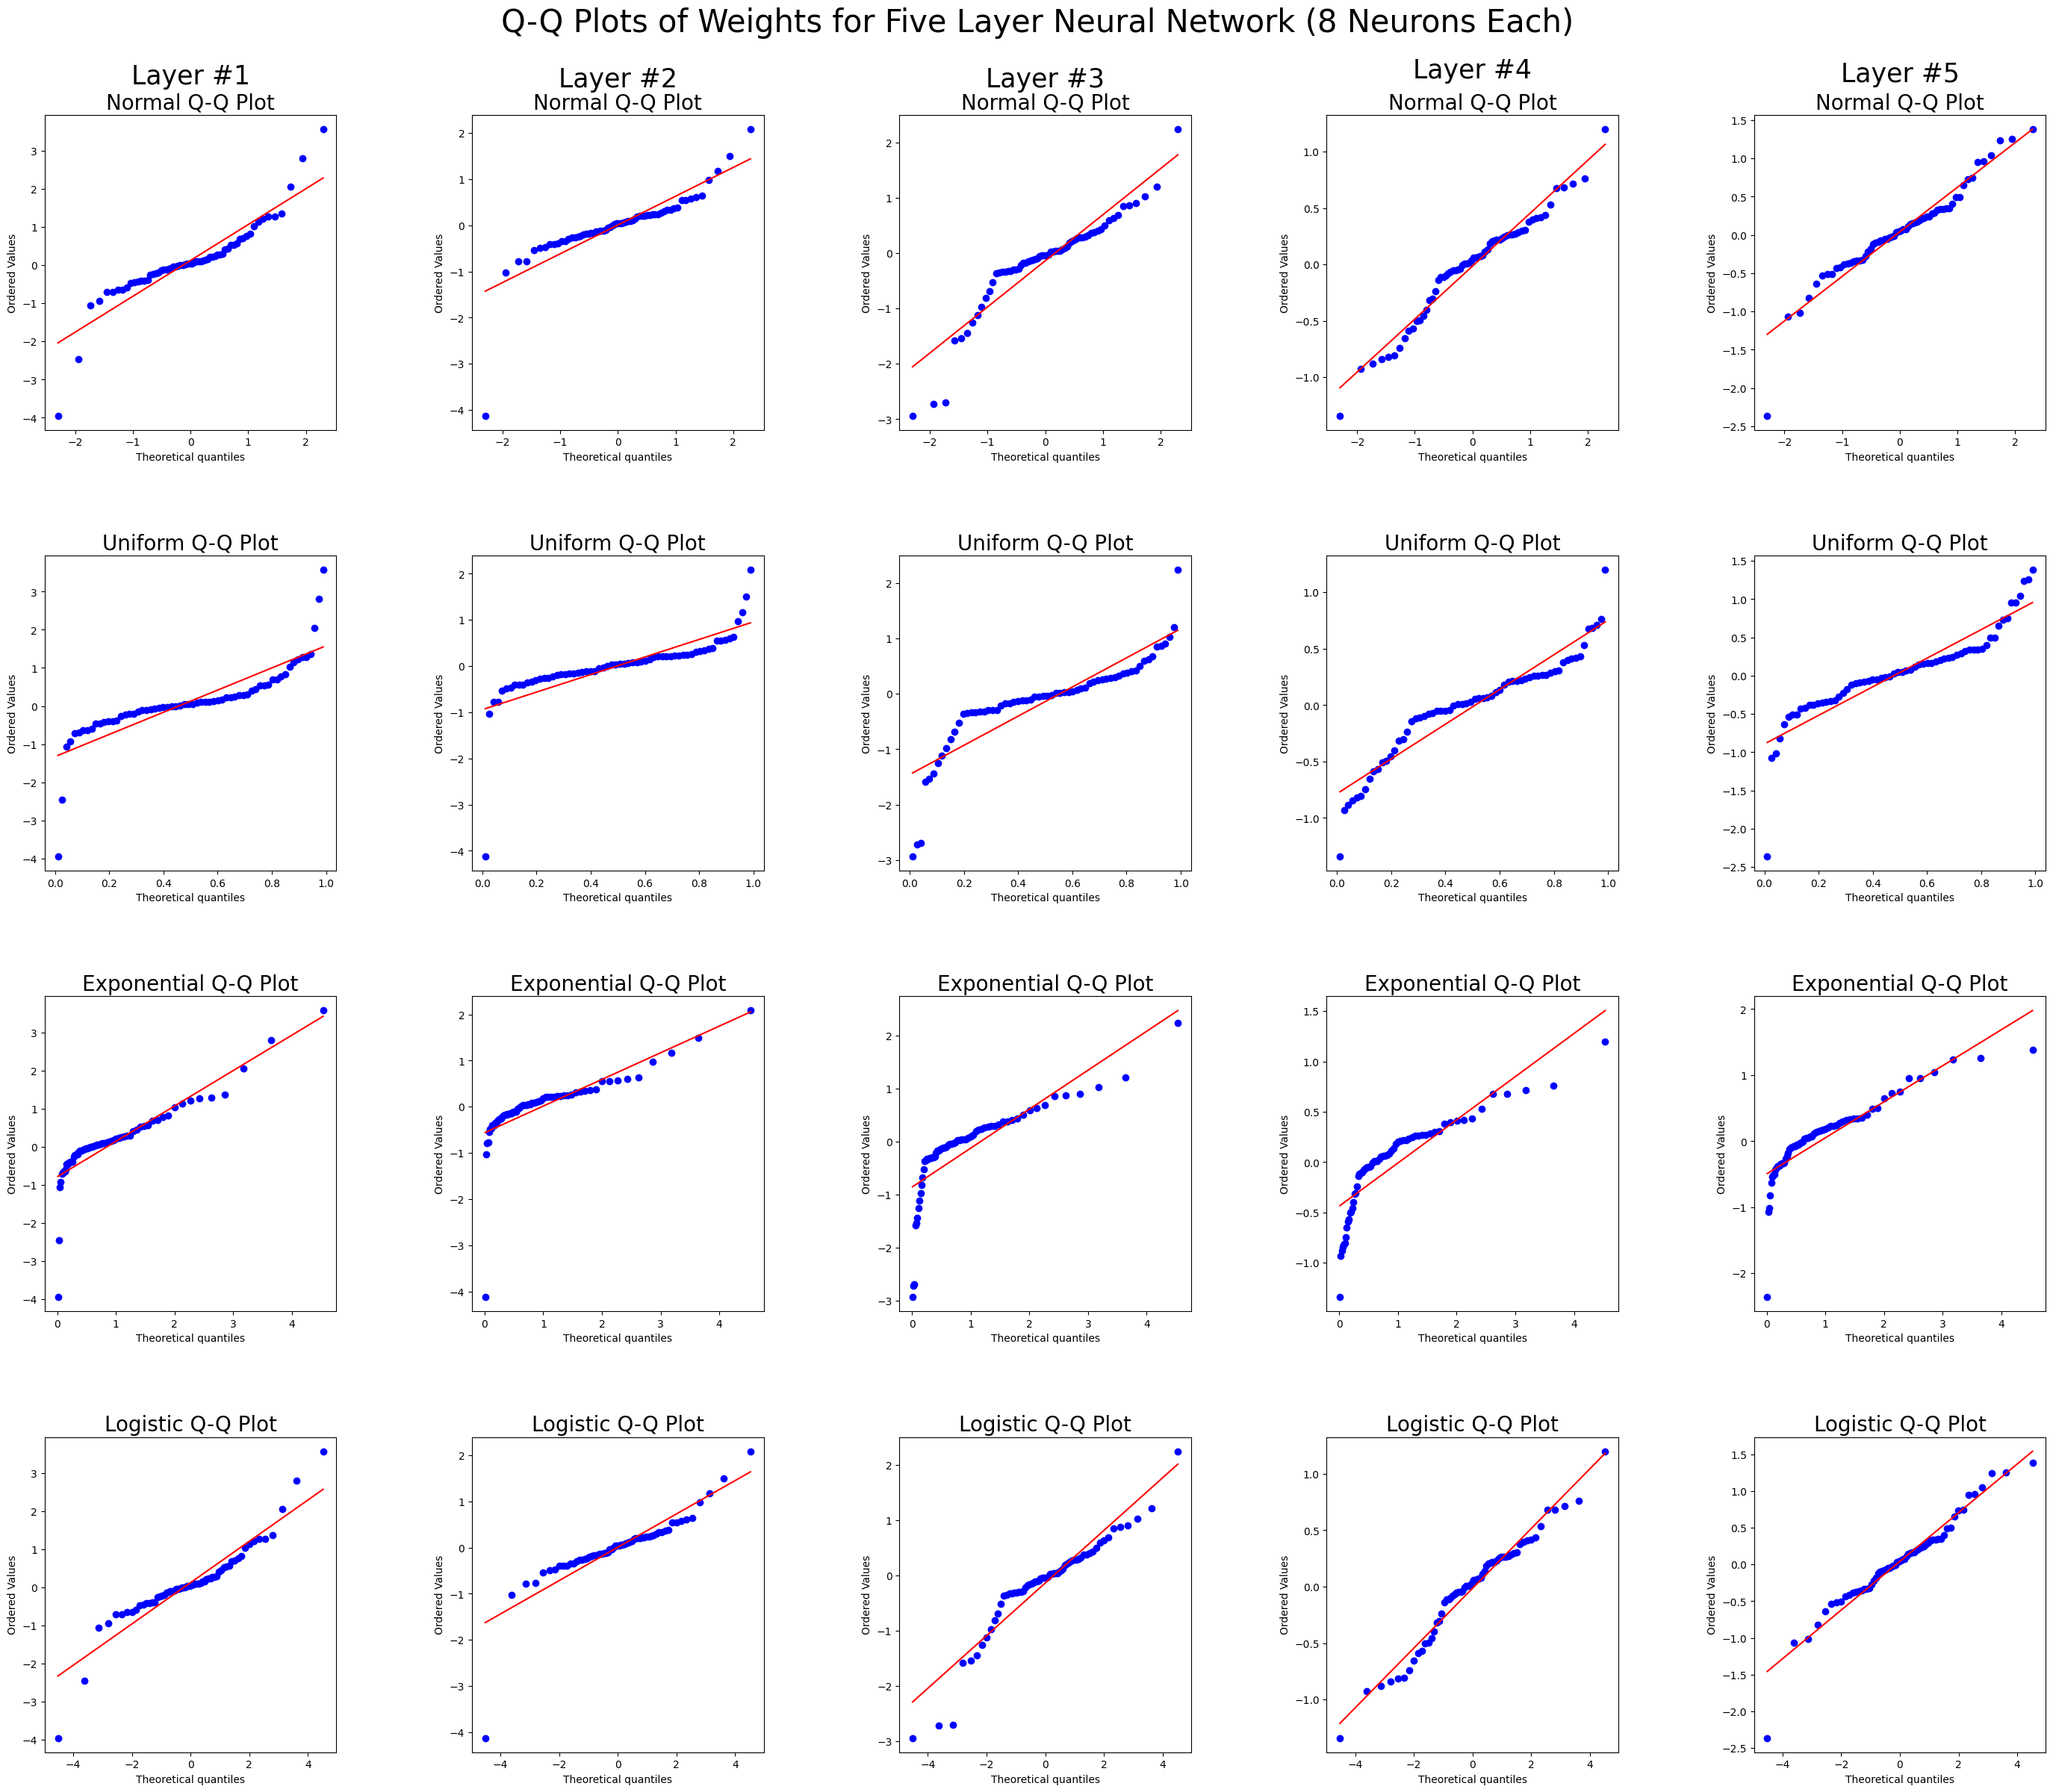

In [40]:
qq_points1 = model5_dict['weights'][0].flatten()
nuerons1 = len(model5_dict['weights'][0])
qq_points2 = model5_dict['weights'][2].flatten()
nuerons2 = len(model5_dict['weights'][2])
qq_points3 = model5_dict['weights'][4].flatten()
nuerons3 = len(model5_dict['weights'][4])
qq_points4 = model5_dict['weights'][6].flatten()
nuerons4 = len(model5_dict['weights'][6])
qq_points5 = model5_dict['weights'][8].flatten()
nuerons5 = len(model5_dict['weights'][8])

fig, axes = plt.subplots(4, 5, figsize=(30, 25))
fig.tight_layout(pad=10)

fig.suptitle("Q-Q Plots of Weights for Five Layer Neural Network (8 Neurons Each)", fontsize = 30, y = 1)

# layer 1
axes[0,0].text(0, 4.75, "Layer #1", fontsize = 25, ha = "center")
stats.probplot(qq_points1, dist = "norm", plot = axes[0,0])
axes[0,0].set_title("Normal Q-Q Plot", fontsize = 20)
stats.probplot(qq_points1, dist = "uniform", plot = axes[1,0])
axes[1,0].set_title("Uniform Q-Q Plot", fontsize = 20)
stats.probplot(qq_points1, dist = "expon", plot = axes[2,0])
axes[2,0].set_title("Exponential Q-Q Plot", fontsize = 20)
stats.probplot(qq_points1, dist = "logistic", plot = axes[3,0])
axes[3,0].set_title("Logistic Q-Q Plot", fontsize = 20)

# layer 2
axes[0,1].text(0, 3, "Layer #2", fontsize = 25, ha = "center")
stats.probplot(qq_points2, dist = "norm", plot = axes[0,1])
axes[0,1].set_title("Normal Q-Q Plot", fontsize = 20)
stats.probplot(qq_points2, dist = "uniform", plot = axes[1,1])
axes[1,1].set_title("Uniform Q-Q Plot", fontsize = 20)
stats.probplot(qq_points2, dist = "expon", plot = axes[2,1])
axes[2,1].set_title("Exponential Q-Q Plot", fontsize = 20)
stats.probplot(qq_points2, dist = "logistic", plot = axes[3,1])
axes[3,1].set_title("Logistic Q-Q Plot", fontsize = 20)

# layer 3
axes[0,2].text(0, 3, "Layer #3", fontsize = 25, ha = "center")
stats.probplot(qq_points3, dist = "norm", plot = axes[0,2])
axes[0,2].set_title("Normal Q-Q Plot", fontsize = 20)
stats.probplot(qq_points3, dist = "uniform", plot = axes[1,2])
axes[1,2].set_title("Uniform Q-Q Plot", fontsize = 20)
stats.probplot(qq_points3, dist = "expon", plot = axes[2,2])
axes[2,2].set_title("Exponential Q-Q Plot", fontsize = 20)
stats.probplot(qq_points3, dist = "logistic", plot = axes[3,2])
axes[3,2].set_title("Logistic Q-Q Plot", fontsize = 20)

# layer 4
axes[0,3].text(0, 1.65, "Layer #4", fontsize = 25, ha = "center")
stats.probplot(qq_points4, dist = "norm", plot = axes[0,3])
axes[0,3].set_title("Normal Q-Q Plot", fontsize = 20)
stats.probplot(qq_points4, dist = "uniform", plot = axes[1,3])
axes[1,3].set_title("Uniform Q-Q Plot", fontsize = 20)
stats.probplot(qq_points4, dist = "expon", plot = axes[2,3])
axes[2,3].set_title("Exponential Q-Q Plot", fontsize = 20)
stats.probplot(qq_points4, dist = "logistic", plot = axes[3,3])
axes[3,3].set_title("Logistic Q-Q Plot", fontsize = 20)

# layer 5
axes[0,4].text(0, 2, "Layer #5", fontsize = 25, ha = "center")
stats.probplot(qq_points5, dist = "norm", plot = axes[0,4])
axes[0,4].set_title("Normal Q-Q Plot", fontsize = 20)
stats.probplot(qq_points5, dist = "uniform", plot = axes[1,4])
axes[1,4].set_title("Uniform Q-Q Plot", fontsize = 20)
stats.probplot(qq_points5, dist = "expon", plot = axes[2,4])
axes[2,4].set_title("Exponential Q-Q Plot", fontsize = 20)
stats.probplot(qq_points5, dist = "logistic", plot = axes[3,4])
axes[3,4].set_title("Logistic Q-Q Plot", fontsize = 20)

#### 6.3: Ten Layers

In [133]:
feature1_boxplot_dict = {"boxes":[]}
feature2_boxplot_dict = {"boxes":[]}
feature3_boxplot_dict = {"boxes":[]}
feature4_boxplot_dict = {"boxes":[]}
feature5_boxplot_dict = {"boxes":[]}
feature6_boxplot_dict = {"boxes":[]}
feature7_boxplot_dict = {"boxes":[]}
feature8_boxplot_dict = {"boxes":[]}

for i in range(0,20,2):
    feature1_boxplot_dict["boxes"].append(list(model10_dict["weights"][i][:,0]))
    feature2_boxplot_dict["boxes"].append(list(model10_dict["weights"][i][:,1]))
    feature3_boxplot_dict["boxes"].append(list(model10_dict["weights"][i][:,2]))
    feature4_boxplot_dict["boxes"].append(list(model10_dict["weights"][i][:,3]))
    feature5_boxplot_dict["boxes"].append(list(model10_dict["weights"][i][:,4]))
    feature6_boxplot_dict["boxes"].append(list(model10_dict["weights"][i][:,5]))
    feature7_boxplot_dict["boxes"].append(list(model10_dict["weights"][i][:,6]))
    feature8_boxplot_dict["boxes"].append(list(model10_dict["weights"][i][:,7]))

Text(0.43, 0.93, 'Test Accuracy: 71.45368456840515')

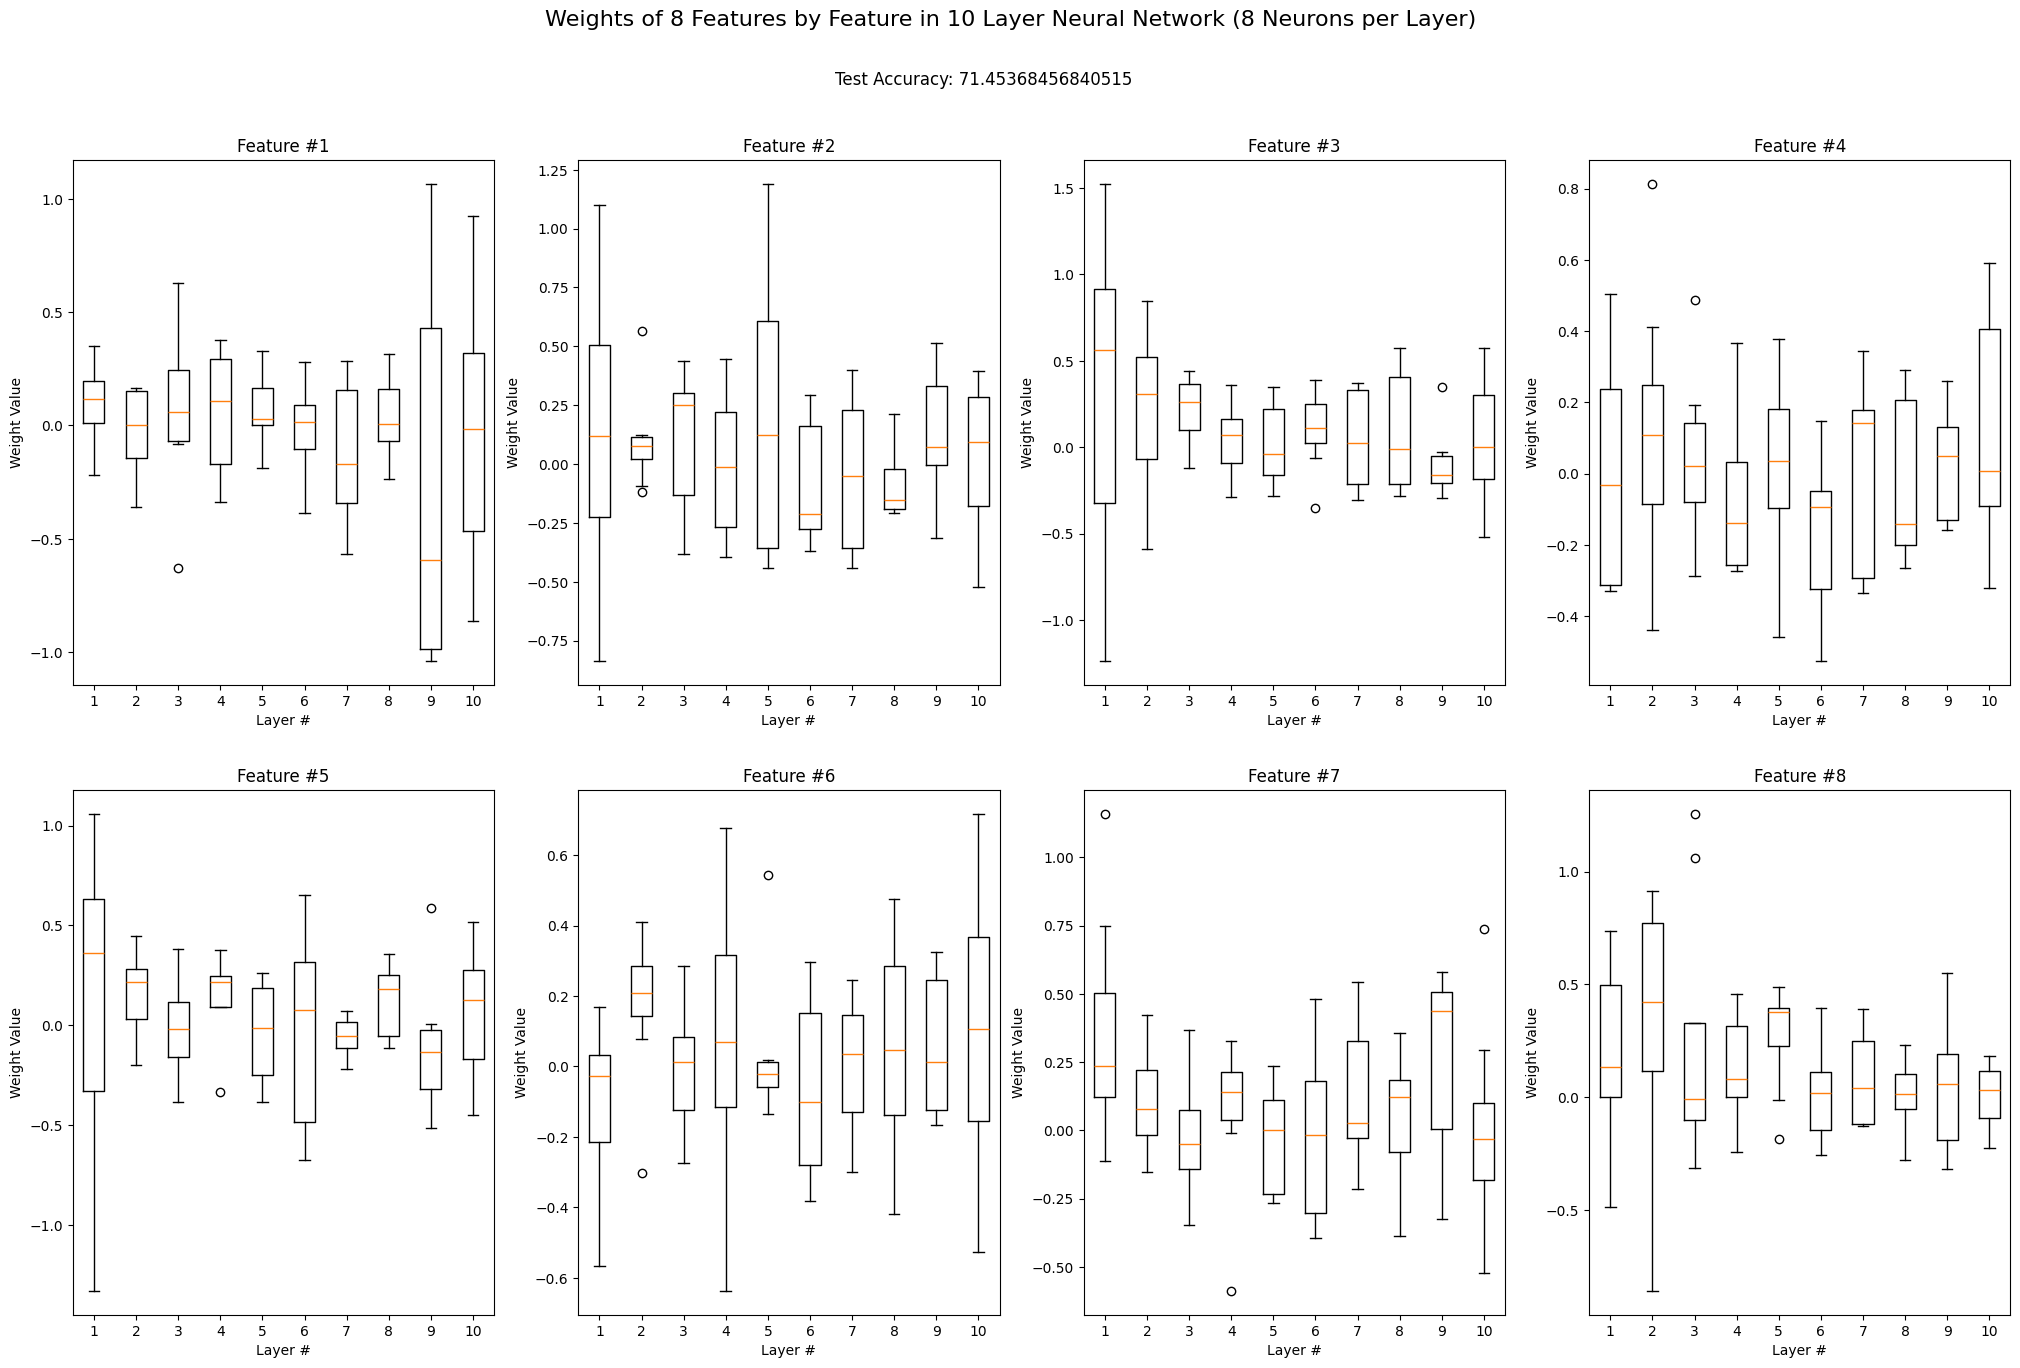

In [134]:
fig, axes = plt.subplots(2, 4, figsize=(25, 15))

axes[0,0].boxplot(feature1_boxplot_dict["boxes"])
axes[0,1].boxplot(feature2_boxplot_dict["boxes"])
axes[0,2].boxplot(feature3_boxplot_dict["boxes"])
axes[0,3].boxplot(feature4_boxplot_dict["boxes"])
axes[1,0].boxplot(feature5_boxplot_dict["boxes"])
axes[1,1].boxplot(feature6_boxplot_dict["boxes"])
axes[1,2].boxplot(feature7_boxplot_dict["boxes"])
axes[1,3].boxplot(feature8_boxplot_dict["boxes"])


for i in range(2):
    for j in range(4):
        axes[i,j].set_title(label = f"Feature #{i*4+j+1}")
        axes[i,j].set_xlabel("Layer #")
        axes[i,j].set_ylabel("Weight Value")

fig.suptitle("Weights of 8 Features by Feature in 10 Layer Neural Network (8 Neurons per Layer)", fontsize = 16)
fig.text(0.43, 0.93,f"Test Accuracy: {model10_test_acc}", fontsize =12)

Text(44.847222222222214, 0.5, 'Weight Value')

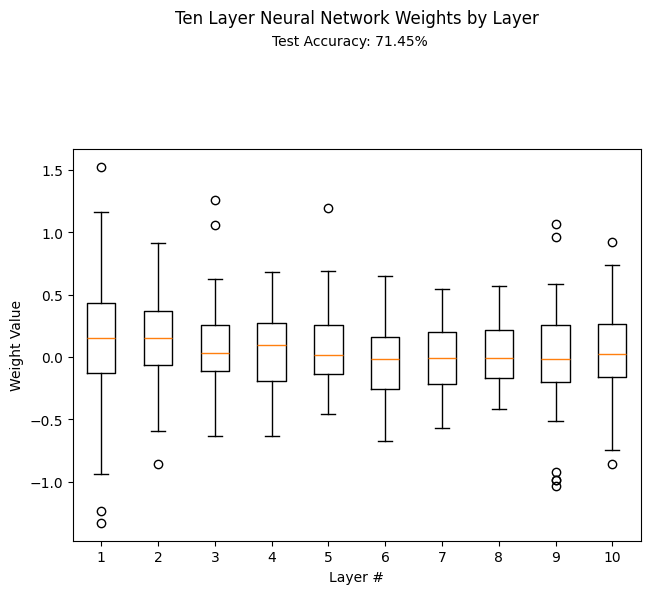

In [141]:
layer_boxplot_dict = {"boxes":[]}
for i in range(0,20,2):
    layer_boxplot_dict["boxes"].append(list(model10_dict["weights"][i].flatten()))
plt.figure(figsize=(7.5,7.5))
plt.boxplot(layer_boxplot_dict['boxes'])
plt.title("Ten Layer Neural Network Weights by Layer", y =1.3)
plt.tight_layout(pad =5)
plt.text(4, 2.5, f"Test Accuracy: {model10_test_acc:.2f}%")
plt.xlabel("Layer #")
plt.ylabel("Weight Value")